This notebook is supposed to work with the pickled data from November 6th, 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os
if not os.path.isdir("results/plots/topics/"):
    os.makedirs("results/plots/topics/")

In [3]:
texts_df = pd.read_pickle("data/processed/texts_new.p")
texts_df =texts_df.reset_index()
texts_reduced=texts_df[['filename','issue_title','volume_number','issue_number','author','language','date','periodical_title']]
texts_reduced=texts_reduced.drop_duplicates()
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [4]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1
            
for topic in topics_count.index:
    texts_reduced[topic]=0

for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

<ipython-input-4-15111ffa44cb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  topics_count = pd.Series()


In [5]:
# probably, this cell can be removed because there should not be any errors
# anymore in the periodical titles. I kept it for the sake of completeness.
texts_corrected=texts_reduced

texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderen','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur françois ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderne','journal_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana \t\t\t\t\t\tveneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana veneta','journal_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou Journal des Mœurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français, ou Journal des moeurs','journal_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.journal_title=='missing'].index)

In [6]:
topic_df=texts_corrected[['language','periodical_title']+list(topics_count.index.values)]

In [7]:
topic_df

,language,periodical_title,Idea of Man,Fashion,Manners and Customs,Morale,Economy,Critics on Nobility,Superstition,Religion,...,France,Other Countries,Charity,Family,Germany,America (West India),Switzerland,Apologetic of Spain,Friendship,Austria
0,French,Le Spectateur ou le Socrate moderne,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,French,Les Chiffons,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,Italian,Lo Spettatore italiano,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,Italian,Spettatore piemontese,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,Italian,Il Filosofo alla Moda,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,Italian,Il Filosofo alla Moda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42541,Italian,Il Socrate Veneto,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42546,Italian,Il Filosofo alla Moda,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42551,French,Le Spectateur françois ou le Nouveau Socrate m...,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
topics_language=topic_df.groupby('periodical_title').sum()
number_issues=topic_df.groupby('periodical_title').count()
number_issues=number_issues['language']
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(number_issues, axis=0)
topics_language.head()

,Idea of Man,Fashion,Manners and Customs,Morale,Economy,Critics on Nobility,Superstition,Religion,Culture of Conversation,Education and Formation,...,France,Other Countries,Charity,Family,Germany,America (West India),Switzerland,Apologetic of Spain,Friendship,Austria
periodical_title,,,,,,,,,,,,,,,,,,,,,
Der Bürger,0.000000,0.000000,0.000000,0.200000,0.0,0.0,0.0,0.0,0.0,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Der Zuschauer,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Die Zuschauerin,0.666667,0.666667,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.000000,0.000000,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0
Donna galante,0.250000,0.861111,0.444444,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,...,0.027778,0.027778,0.027778,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0
El Amigo y Corresponsal del Censor,0.000000,1.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
number_issues.head()

periodical_title
Der Bürger                             5
Der Zuschauer                          2
Die Zuschauerin                        3
Donna galante                         36
El Amigo y Corresponsal del Censor     4
Name: language, dtype: int64

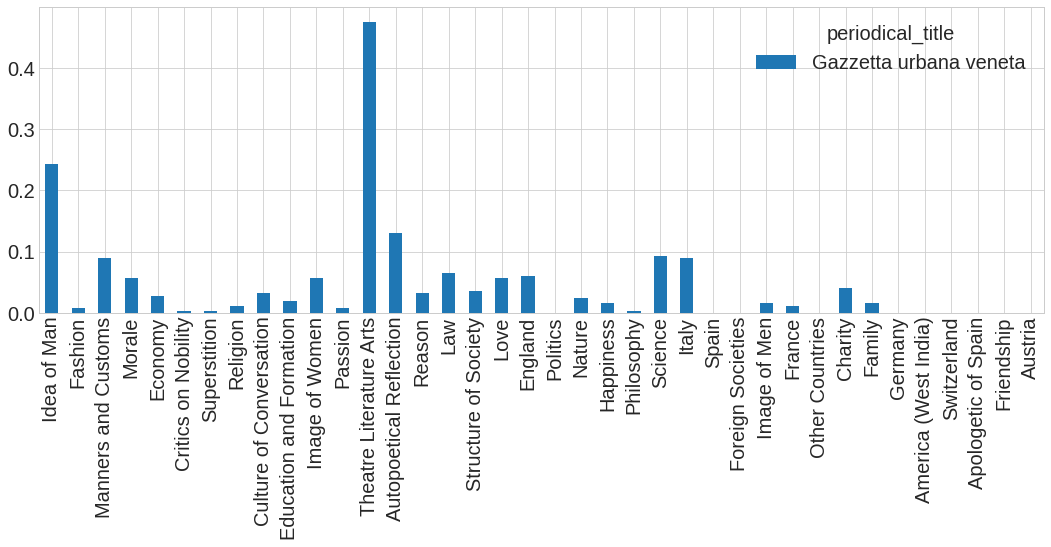

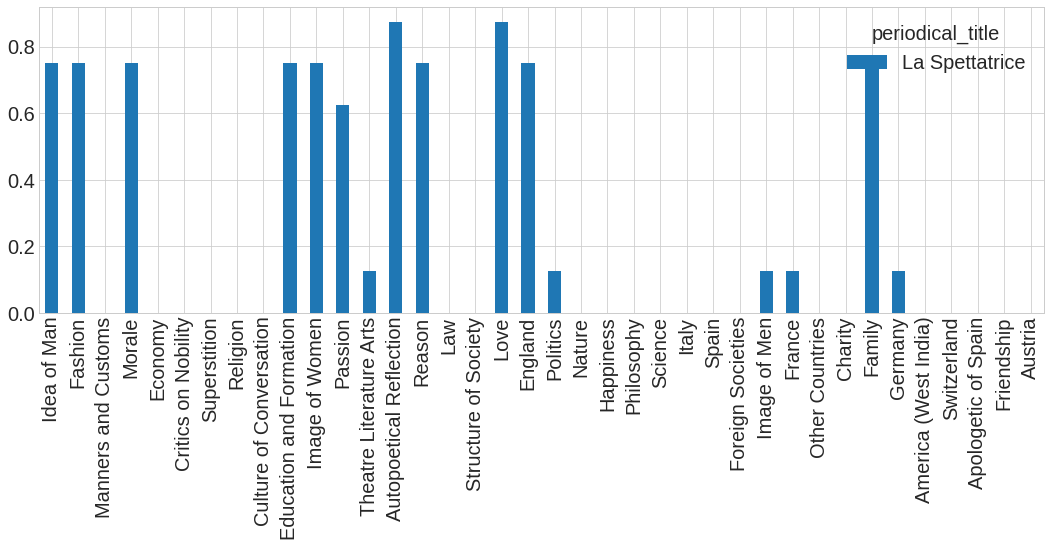

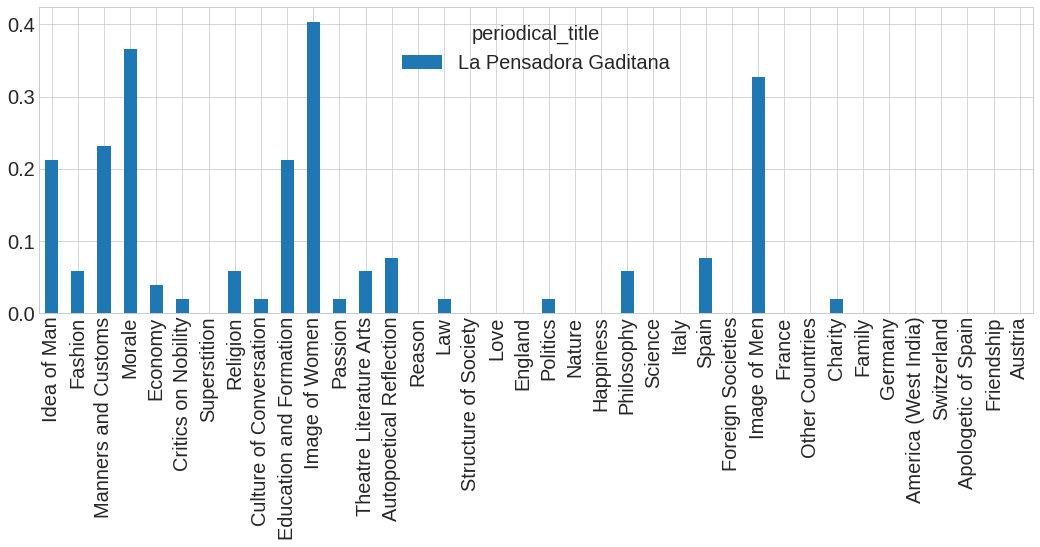

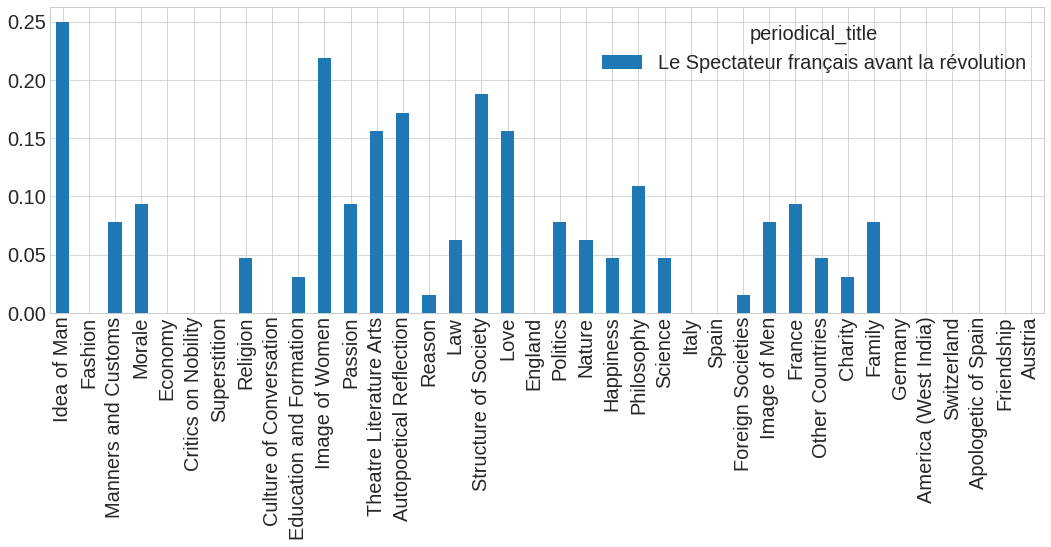

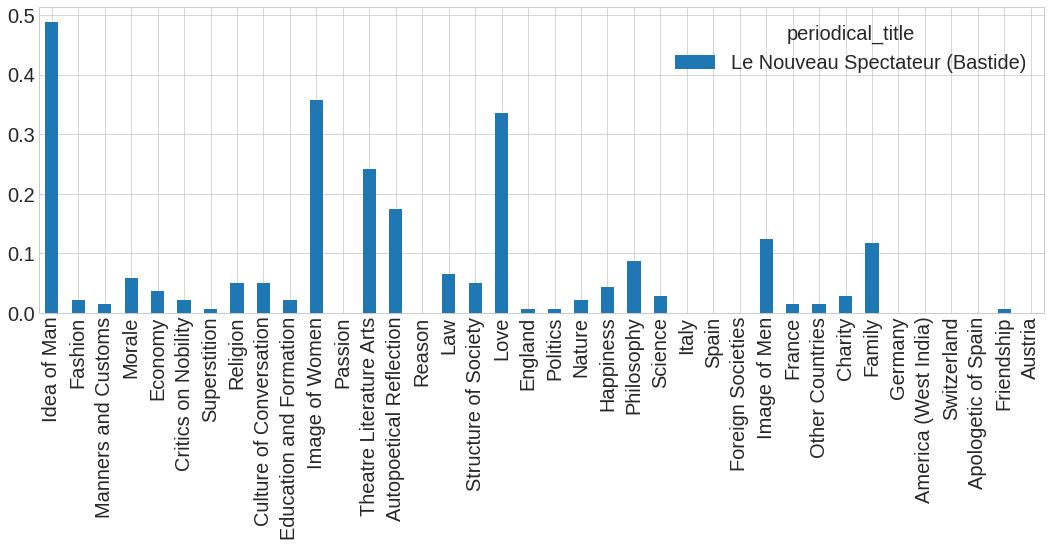

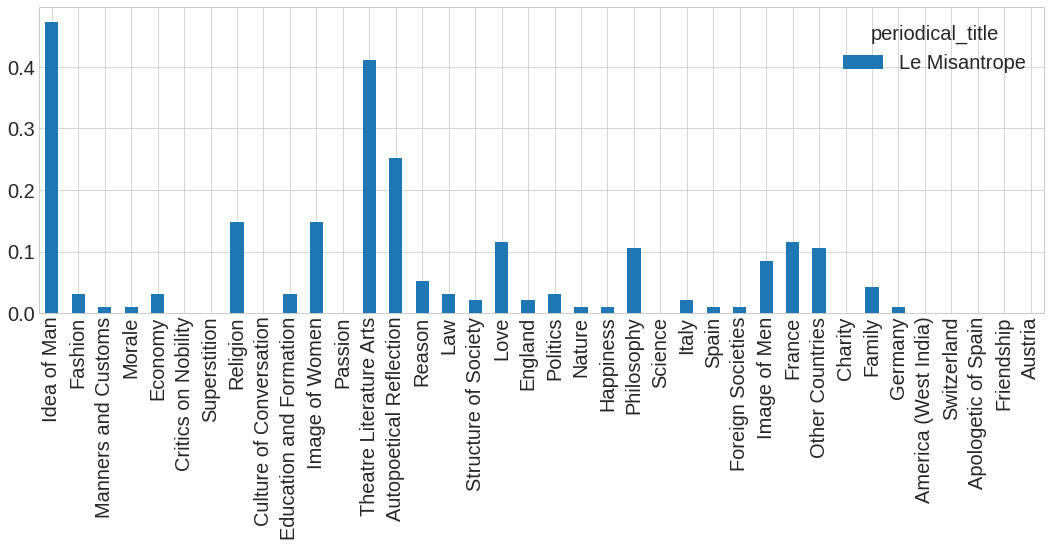

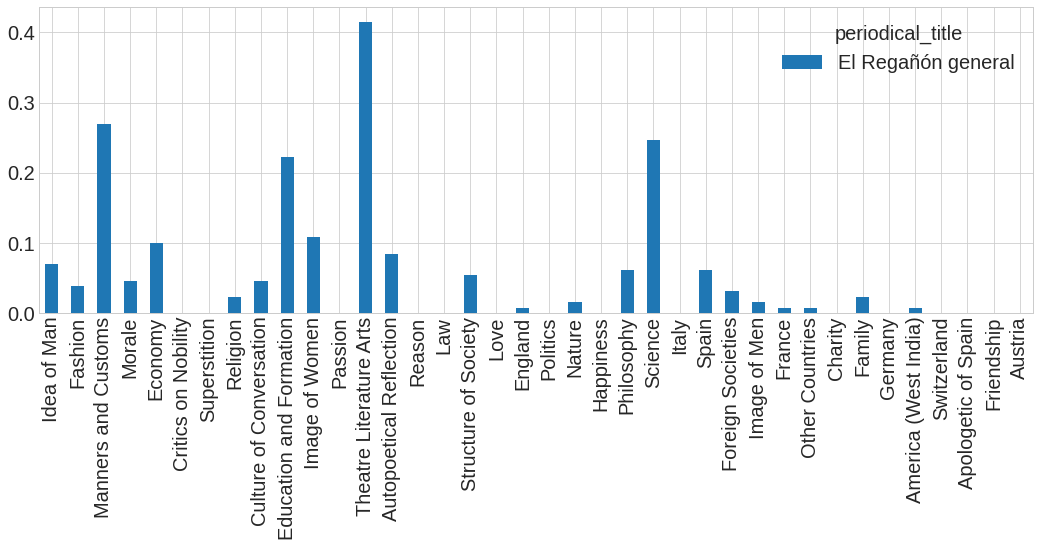

In [10]:
periodical_list=['Gazzetta urbana veneta','La Spettatrice','La Pensadora Gaditana','Le Spectateur français avant la révolution','Le Nouveau Spectateur (Bastide)','Le Misantrope','El Regañón general']
for title in periodical_list:
    topics_language.loc[topics_language.index==title].T.plot(kind='bar',figsize=(15,8))
    plt.tight_layout()
    plt.savefig('results/plots/topics/histograms/'+title+'.pdf')

In [11]:
language_journal=topic_df.pivot_table(values='Switzerland',index='periodical_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal.head()

language,English,French,German,Italian,Portuguese,Spanish; Castilian
periodical_title,,,,,,
Der Bürger,0.0,0.0,1.0,0.0,0.0,0.0
Der Zuschauer,0.0,0.0,1.0,0.0,0.0,0.0
Die Zuschauerin,0.0,0.0,1.0,0.0,0.0,0.0
Donna galante,0.0,0.0,0.0,1.0,0.0,0.0
El Amigo y Corresponsal del Censor,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
Number_of_Clusters=8

from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=50,Tmax=Number_of_Clusters)
m.fit(keep_steps=True)

import os.path
fname='results__all_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

step 1: I(X,T) = 2.948, H(T) = 2.948, T = 8, H(X) = 5.762, I(Y,T) = 0.165, I(X,Y) = 1.166, L = -5.315
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 50.0, Tmax = 8, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 2.952, H(T) = 2.952, T = 8, H(X) = 5.762, I(Y,T) = 0.424, I(X,Y) = 1.166, L = -18.268
step 3: I(X,T) = 2.898, H(T) = 2.898, T = 8, H(X) = 5.762, I(Y,T) = 0.507, I(X,Y) = 1.166, L = -22.433
step 4: I(X,T) = 2.844, H(T) = 2.844, T = 8, H(X) = 5.762, I(Y,T) = 0.521, I(X,Y) = 1.166, L = -23.229
step 5: I(X,T) = 2.821, H(T) = 2.821, T = 8, H(X) = 5.762, I(Y,T) = 0.523, I(X,Y) = 1.166, L = -23.334
step 6: I(X,T) = 2.809, H(T) = 2.809, T = 8, H(X) = 5.762, I(Y,T) = 0.525, I(X,Y) = 1.16

<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-13-4e4fb59bd554>:16: MatplotlibDeprecationWarning: norm

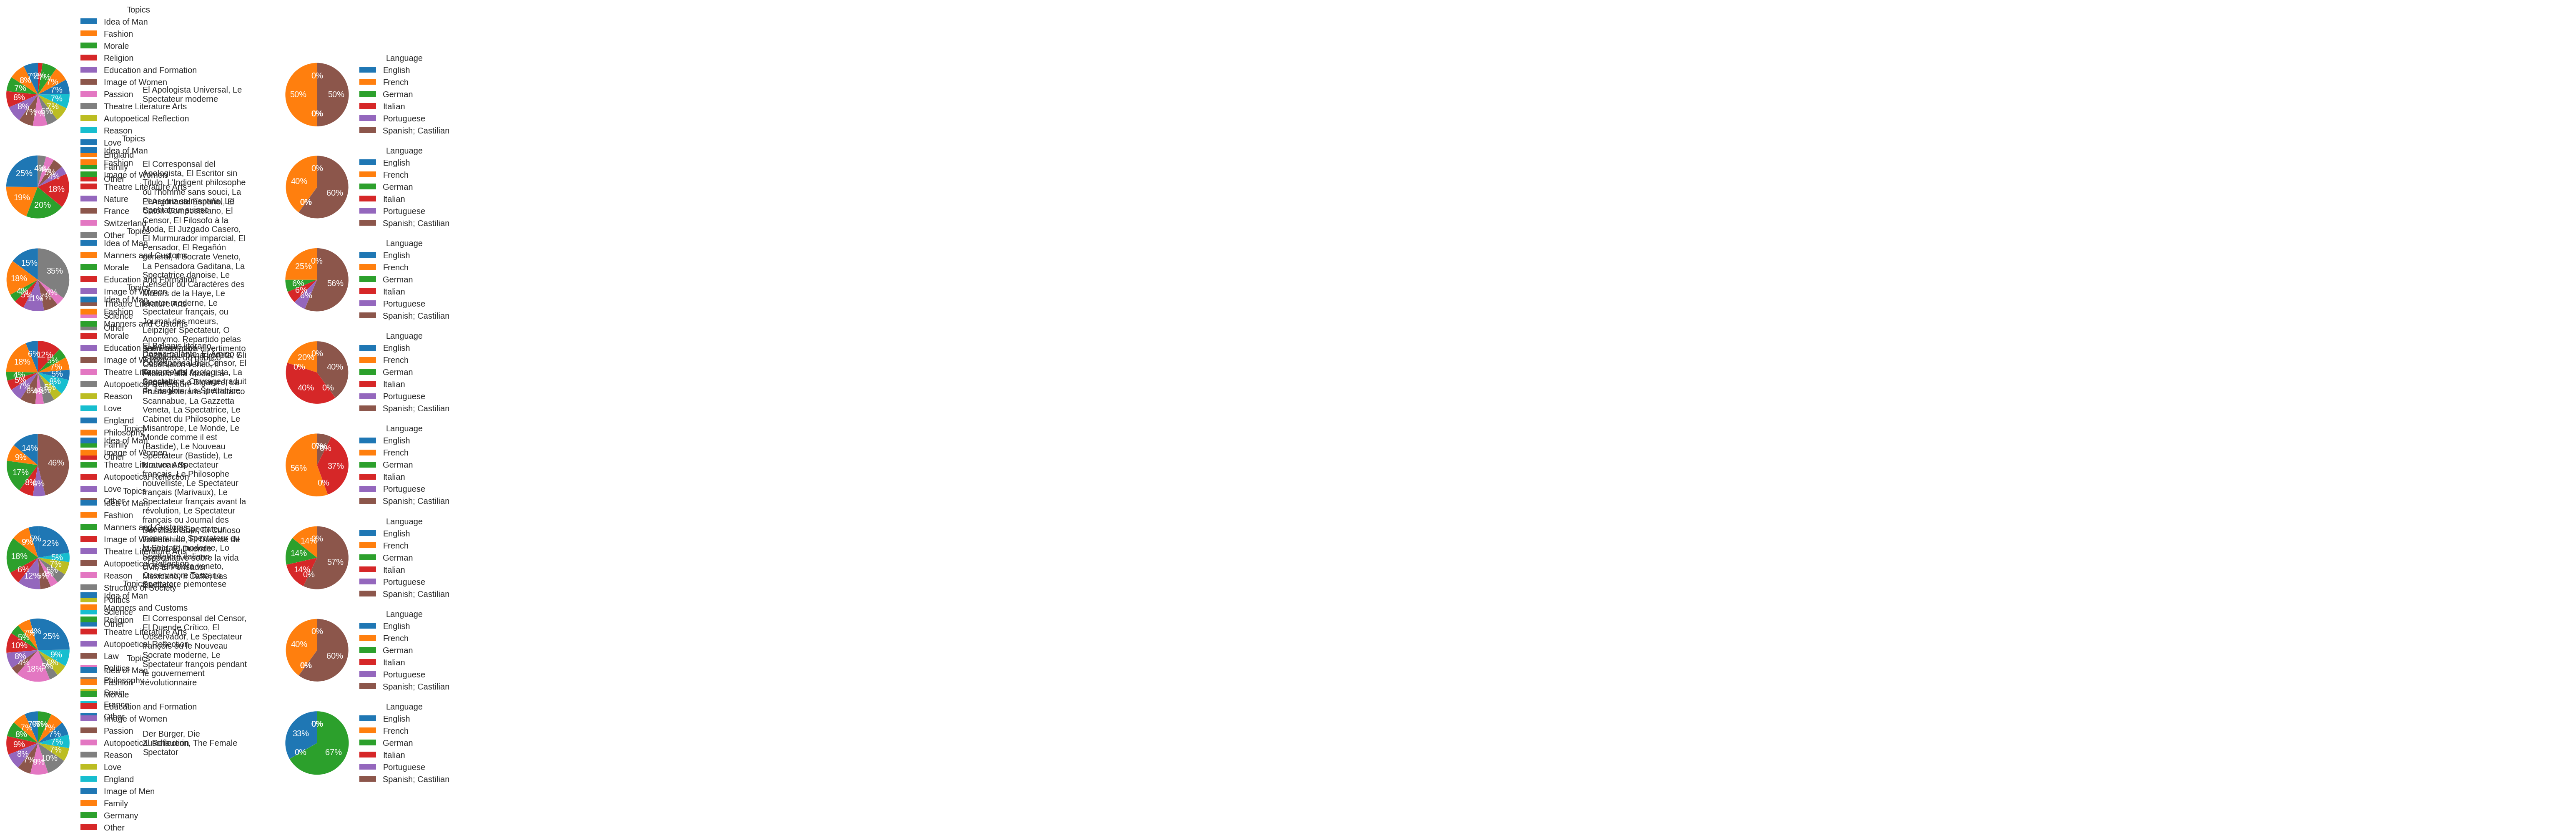

In [13]:
Threshold=0.04

file_result = open('results__all_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    topic_dist=topics_language.loc[best_m.qt_x[Cluster]==1,:].mean()
    topic_dist=topic_dist/np.sum(topic_dist.values)
    relevant_topics=topic_dist[topic_dist>0.04]
    relevant_topics['Other']=max(0,1-sum(relevant_topics))
    

    wedges, texts, autotexts = axs[Cluster][0].pie(relevant_topics, autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, relevant_topics.index,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()
    f.savefig("results/plots/topics/all_topics_summary_"+str(Number_of_Clusters)+"_Clusters.pdf",bbox_inches='tight')

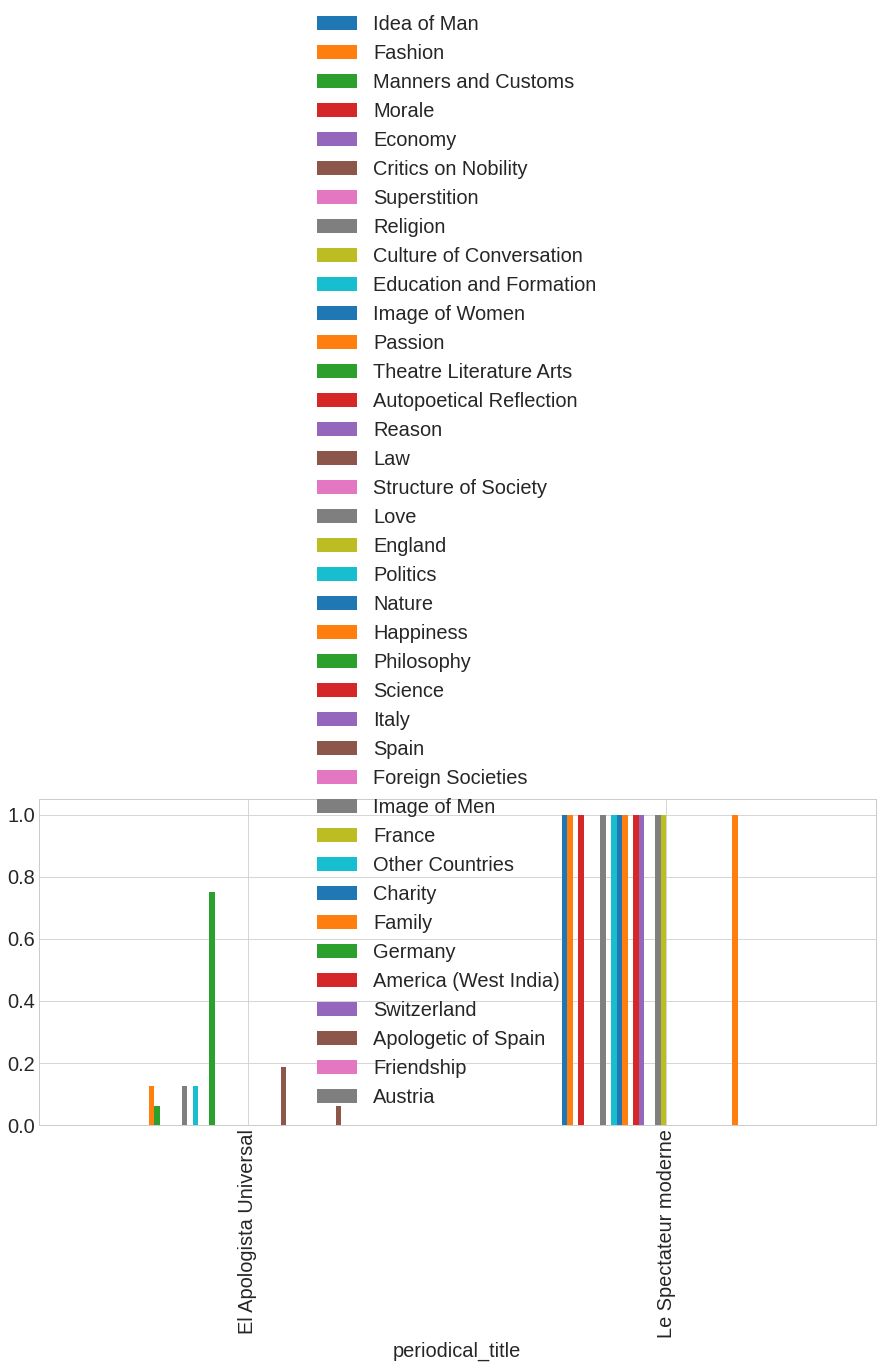

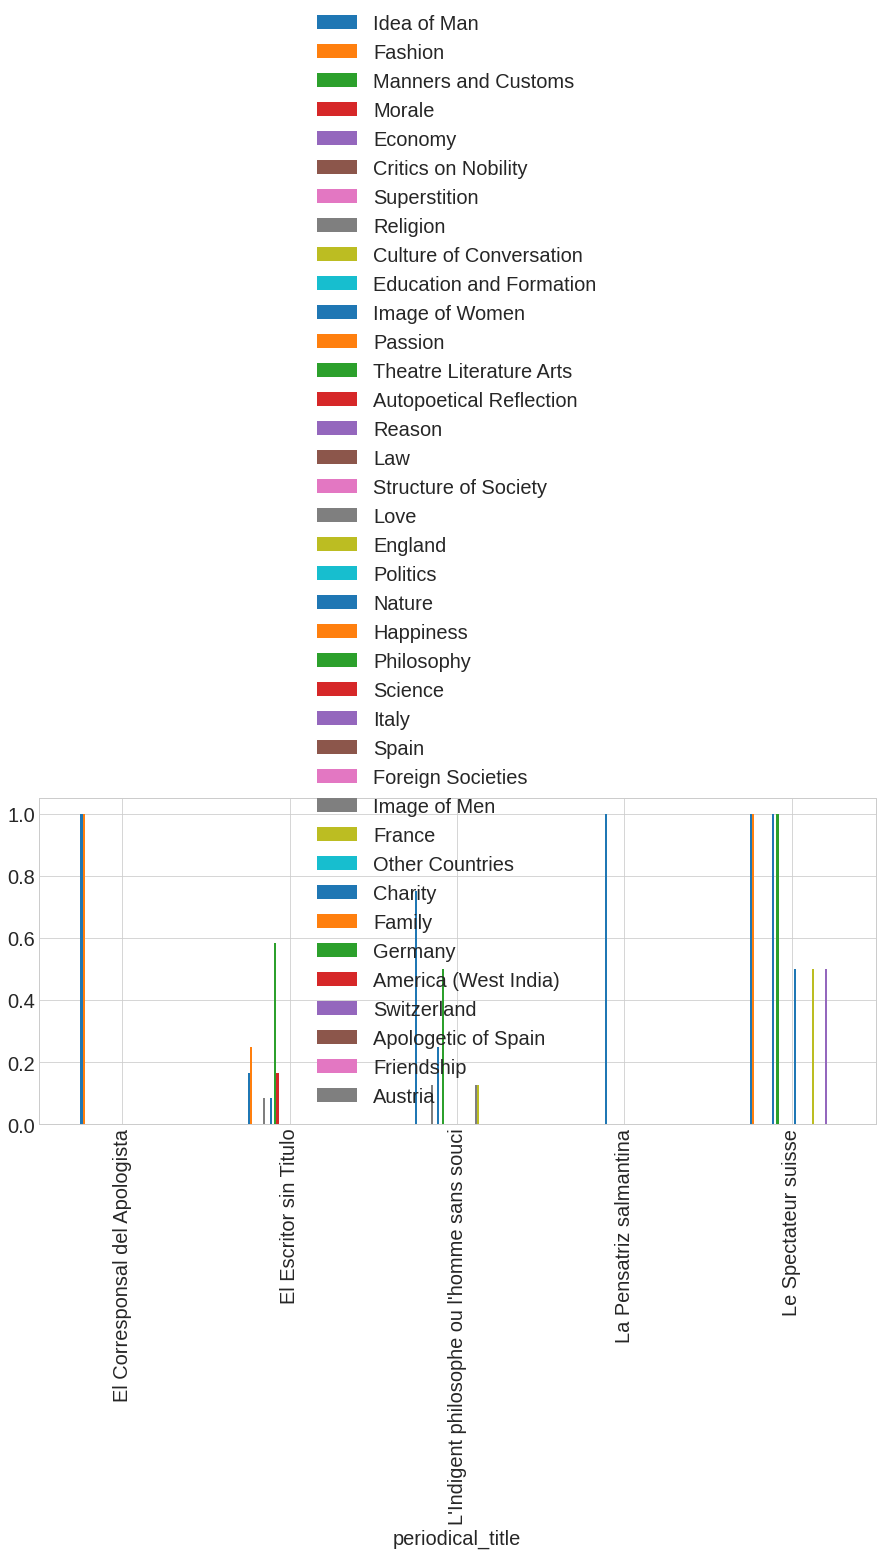

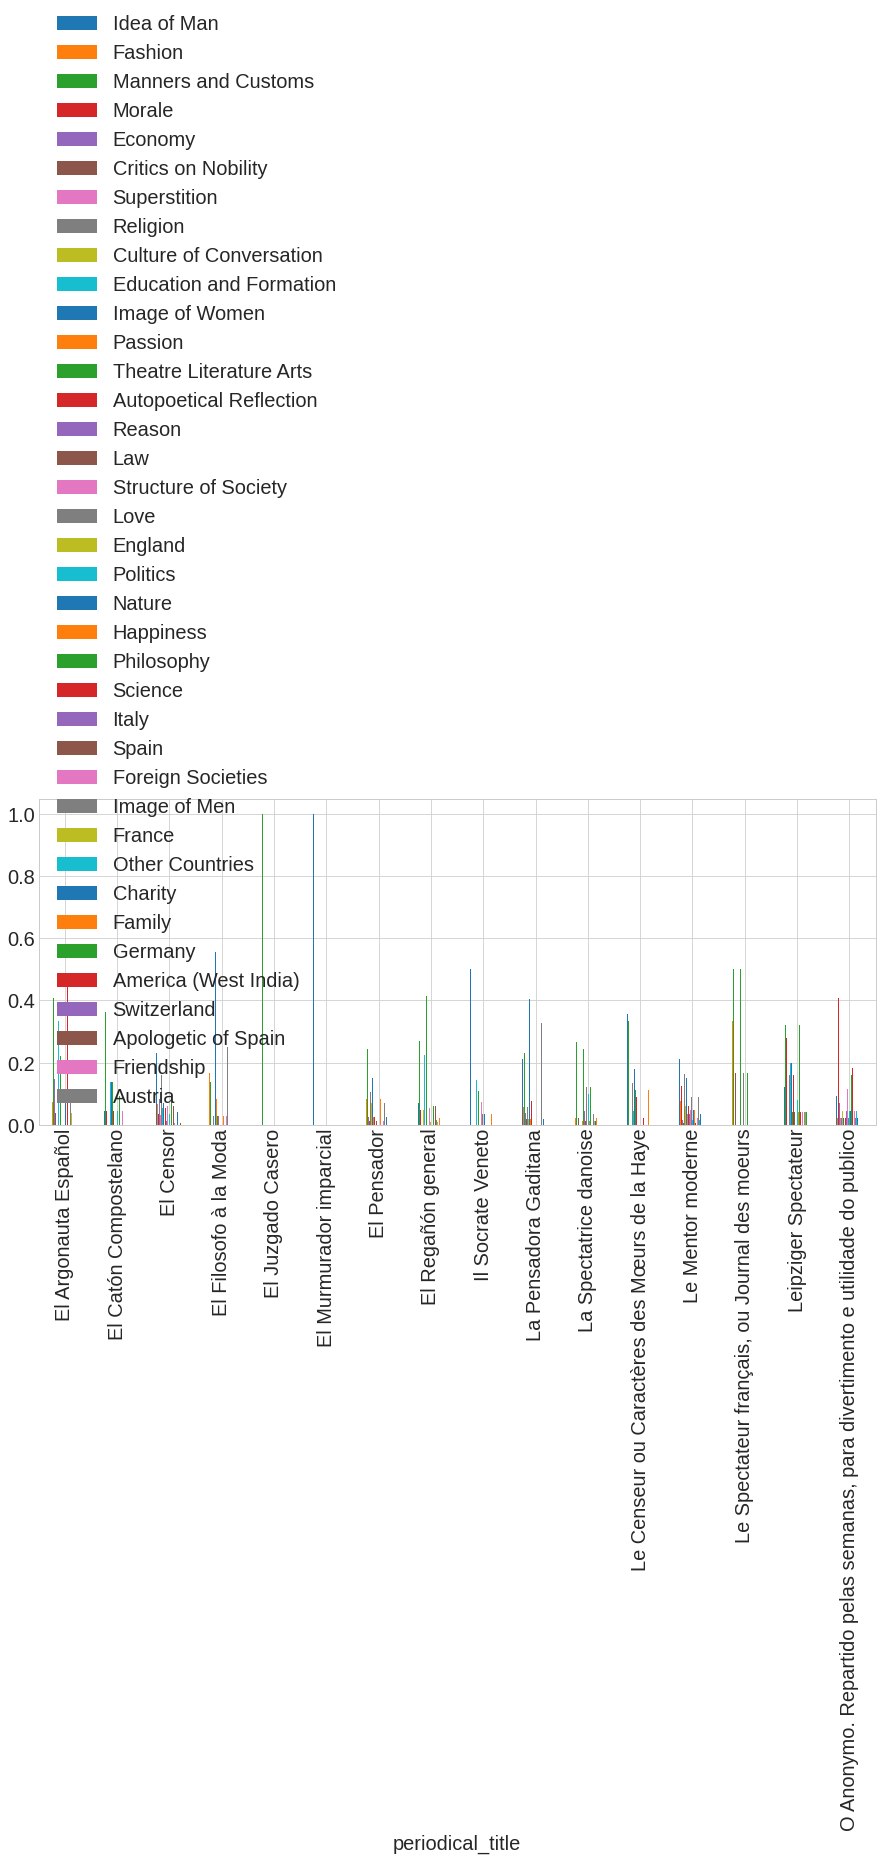

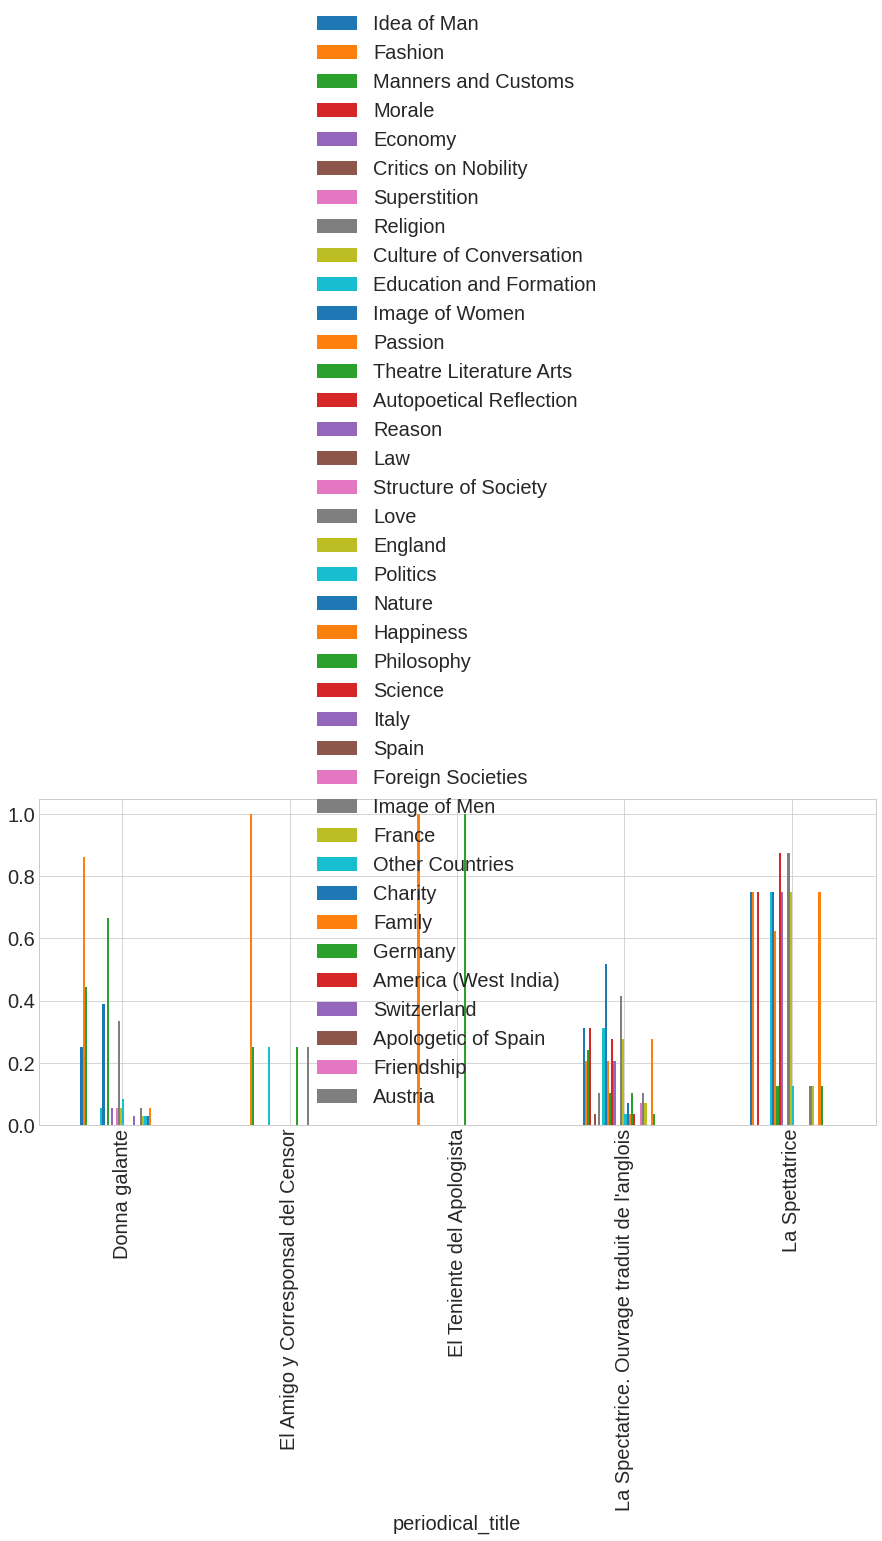

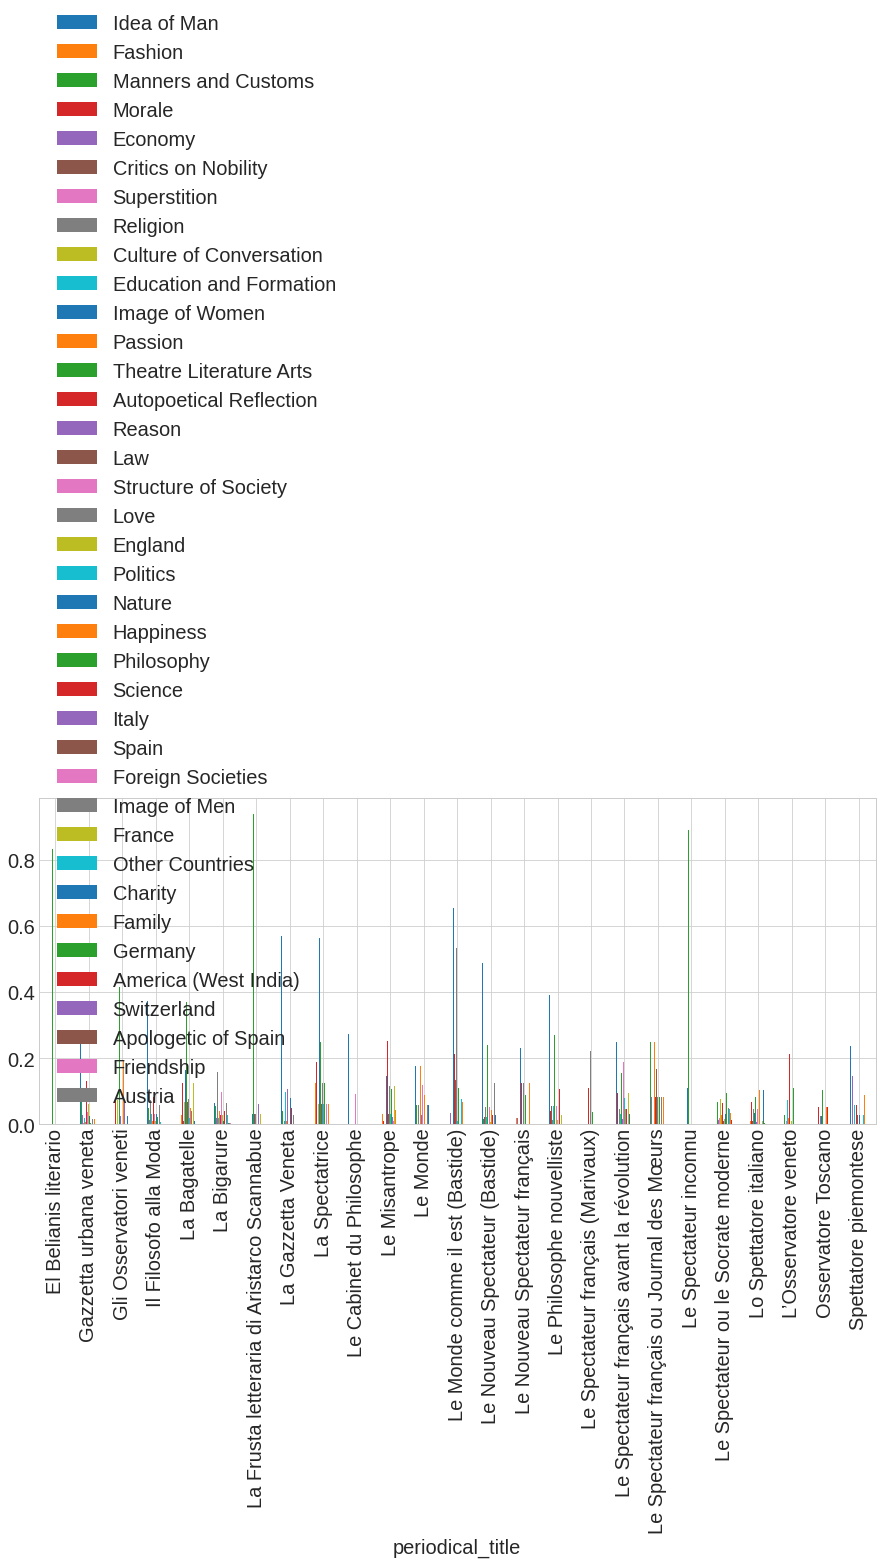

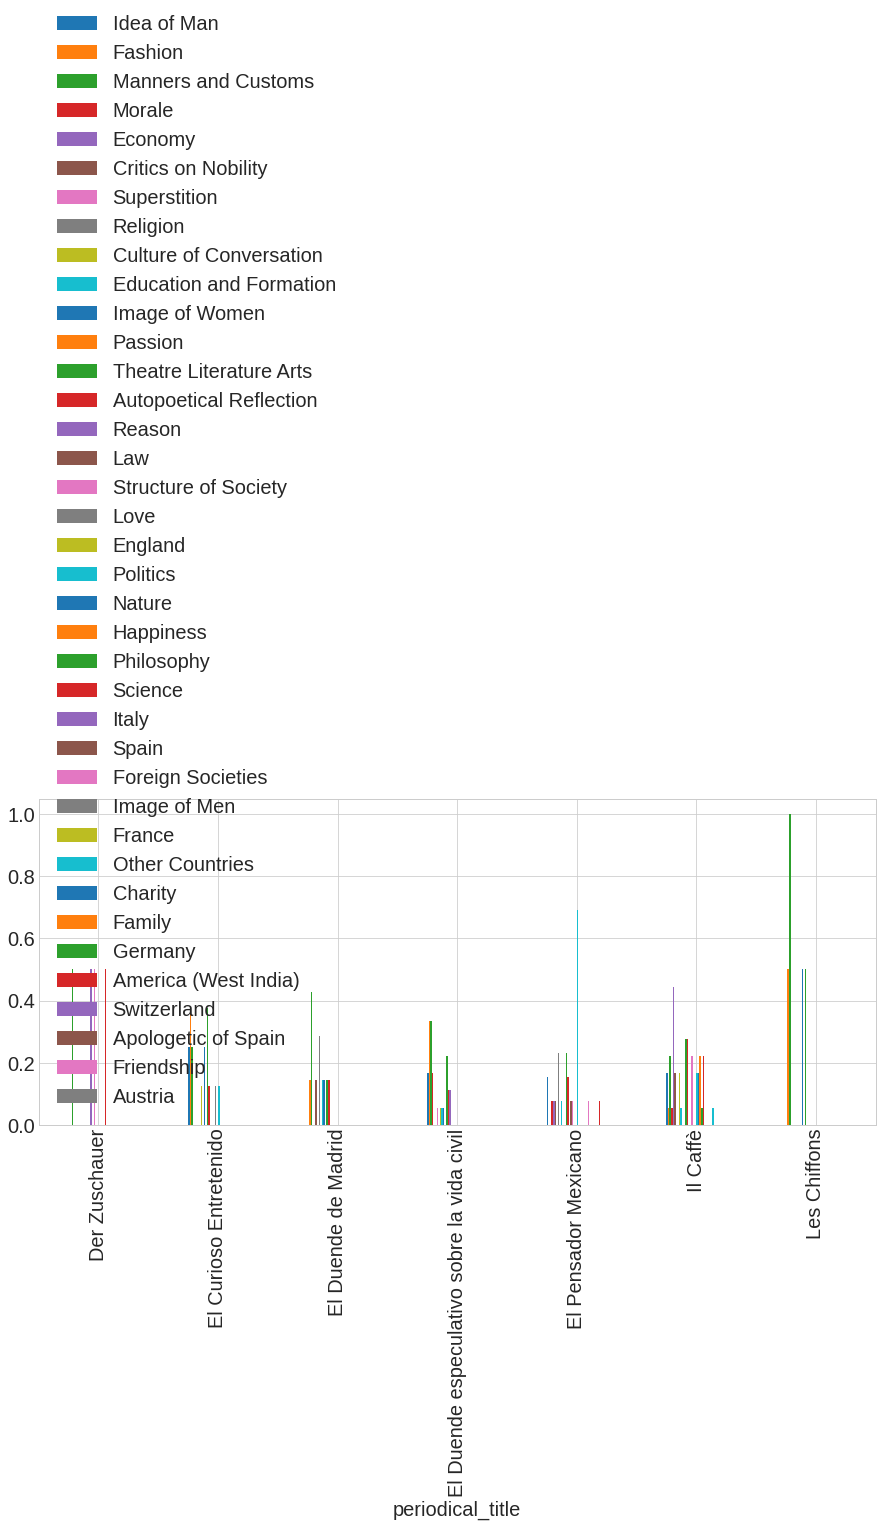

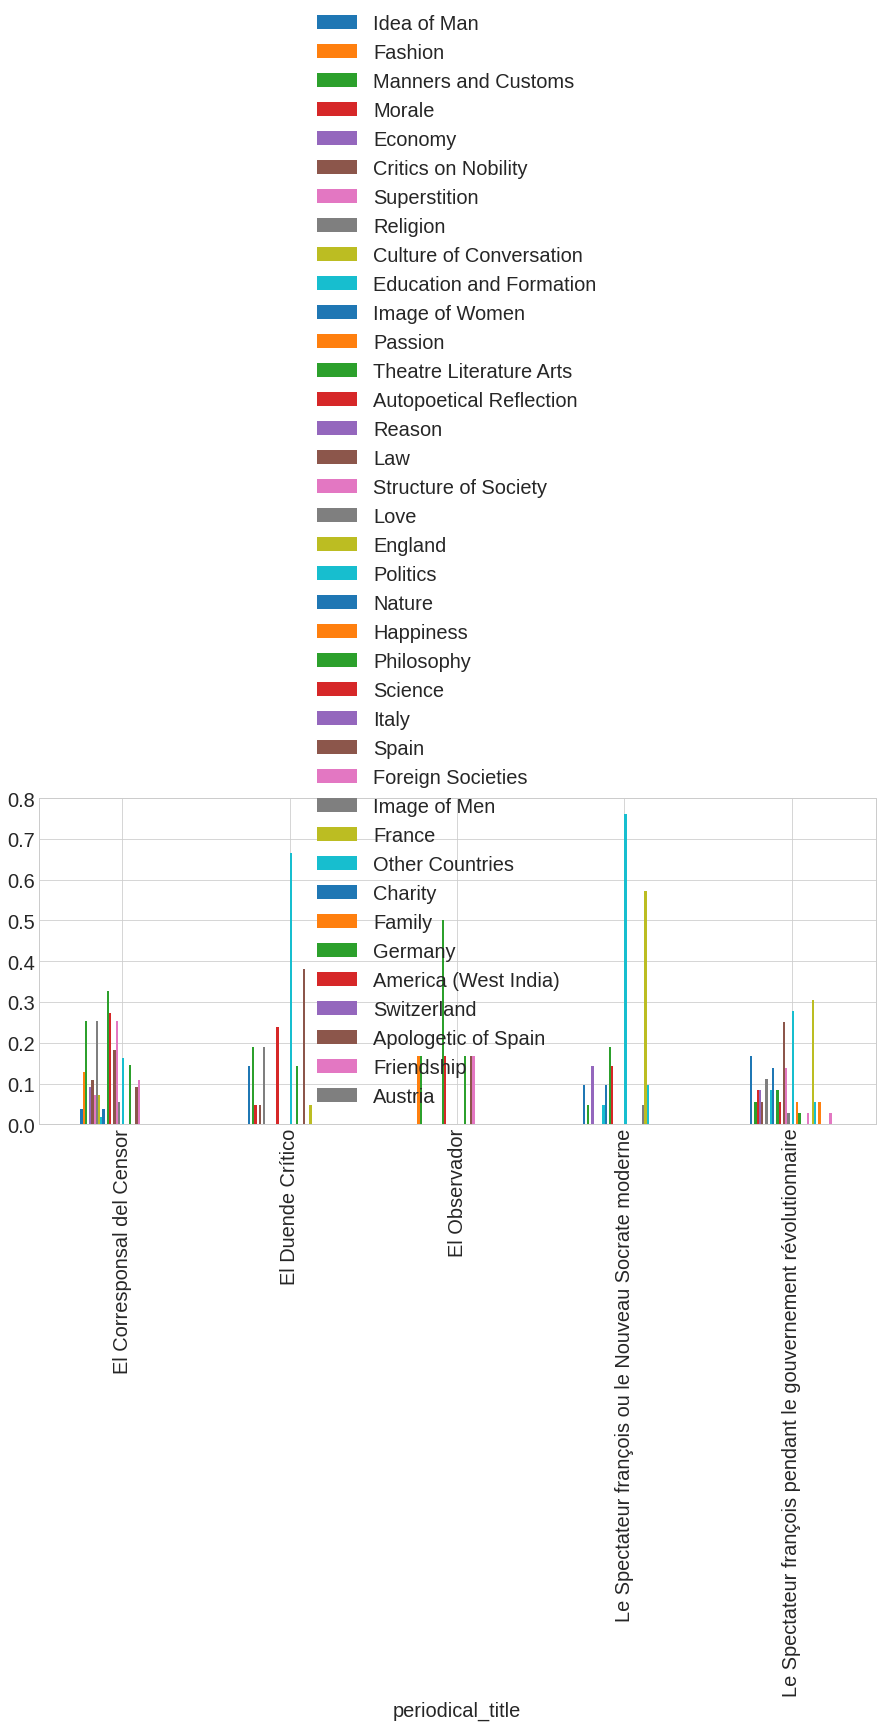

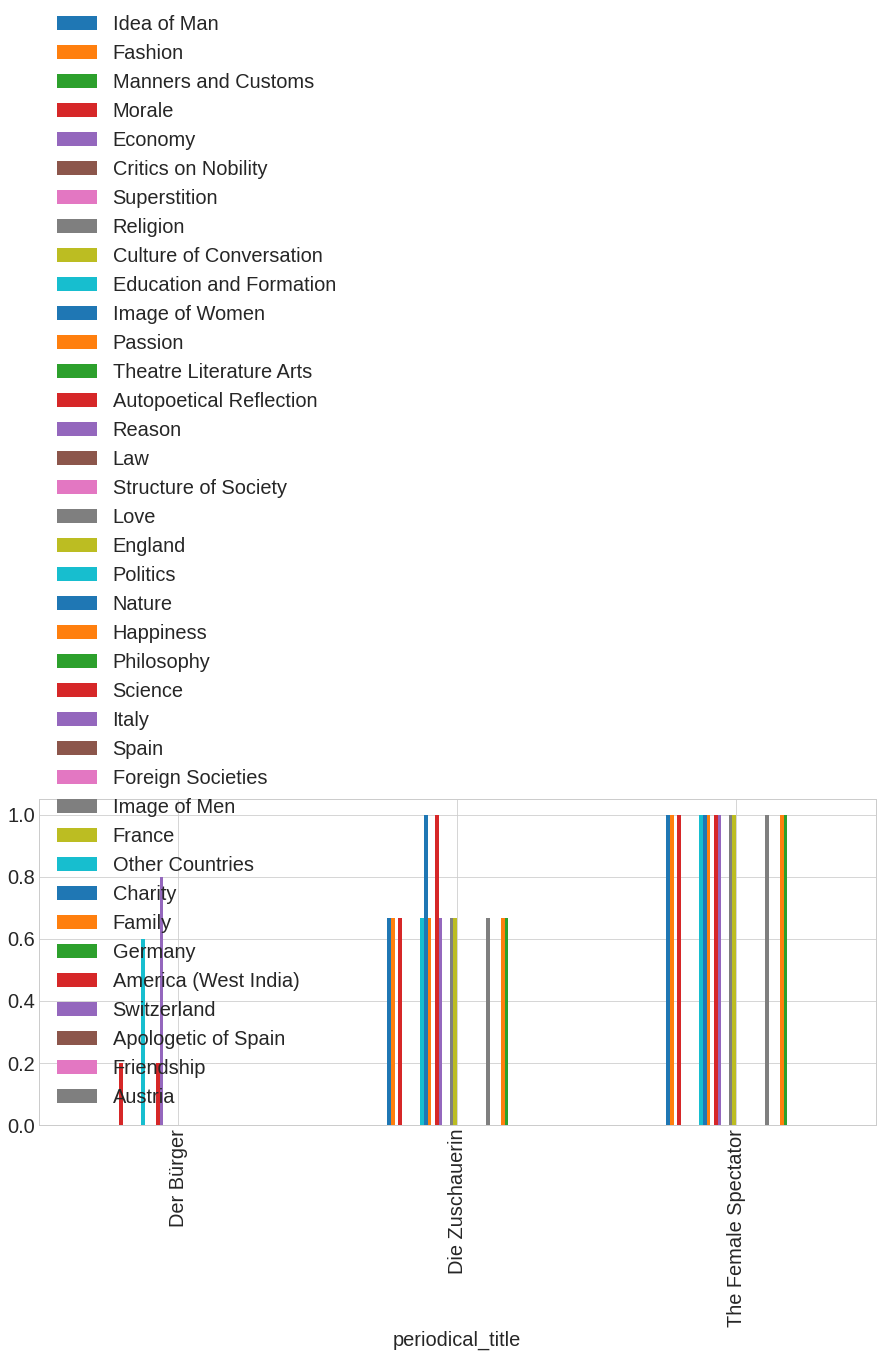

In [14]:
for Cluster in range(Number_of_Clusters):
    axs[Cluster]=topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(kind='bar',figsize=(15,6))